FOR THE FOLLOWING MINI-PROJECT I HAVE USED THE 'Movie_Id_Titles' AND THE 'u.data' DATASETS

In [26]:
#importing all the needed dependecies needed for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white')

In [27]:
columns_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('u.data',sep='\t',names=columns_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [28]:
movie_titles=pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [29]:
#merging both the datasets into one on 'item_id' column
df = pd.merge(df,movie_titles,on='item_id')

SOME USEFUL EDA:

In [30]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [8]:
#Creating a ratings dataframe with title and rating as columns
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [31]:
#Adding a number of ratings column which gives us an idea on how many ratings are given per movie
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


HISTOGRAMS FOR BETTER UNDERSTANDING:

This gives us a general idea of what our data looks like.

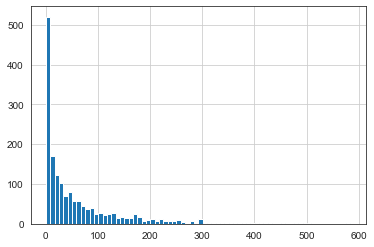

In [10]:
ratings['num of ratings'].hist(bins=70)

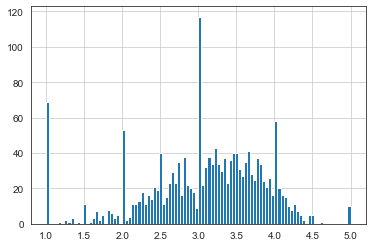

In [11]:
ratings['rating'].hist(bins=100)

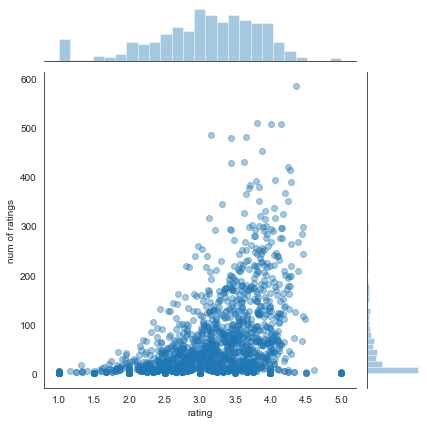

In [12]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.4)

Now we create a matrix that has 'user ids' on one axis and the 'movie title' on another axis.Each cell consists of the rating the user gave to that movie.

In [32]:
moviemat = df.pivot_table(index = 'user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Most rated movies
ratings.sort_values('num of ratings',ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


We accept two movies from the user. We will be recommending movies that are similar to these movies.

In [34]:
mov1_user_ratings = moviemat[input('Input Movie Name :')]
mov2_user_ratings = moviemat[input('Input Movie Name :')]


Input Movie Name : Star Wars (1977)
Input Movie Name : Return of the Jedi (1983)


Note that the movie name that we input has to be the exact same as is in the dataset. 

In [37]:
#user ratings for movie-1
mov1_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [38]:
#user ratings for movie-2
mov2_user_ratings.head()

user_id
0    NaN
1    5.0
2    NaN
3    4.0
4    NaN
Name: Return of the Jedi (1983), dtype: float64

We now use the 'corrwith()' method to get correlations between the two pandas series.

In [39]:
simtomov1 = moviemat.corrwith(mov1_user_ratings) 
simtomov2 = moviemat.corrwith(mov2_user_ratings) 

C:\Users\Parth Rangarajan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Parth Rangarajan\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [40]:
corr_mov1 = pd.DataFrame(simtomov1,columns=['Correlation'])
corr_mov2 = pd.DataFrame(simtomov2,columns=['Correlation'])

Some elementary data cleaning on this dataframe by removing NaN values.

In [43]:
corr_mov1 = pd.DataFrame(simtomov1,columns=['Correlation'])
corr_mov1.dropna(inplace=True)
corr_mov1.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie)

In [45]:
corr_mov1.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0
"Good Man in Africa, A (1994)",1.0


In [20]:
corr_mov2.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Mina Tannenbaum (1994),1.0
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
"Stranger, The (1994)",1.0
Of Human Bondage (1934),1.0
Love and Death on Long Island (1997),1.0


Fixing the aforesaid issue by filtering out movies that have less than 100 reviews.

In [46]:
corr_mov1 = corr_mov1.join(ratings['num of ratings'])

In [47]:
corr_mov1.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [48]:
#Now sorting the values
corr_mov1[corr_mov1['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [49]:
corr_mov2 = corr_mov2.join(ratings['num of ratings'])

In [50]:
corr_mov2[corr_mov2['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Return of the Jedi (1983),1.000000,507
"Empire Strikes Back, The (1980)",0.721229,368
Star Wars (1977),0.672556,584
Raiders of the Lost Ark (1981),0.467391,420
Indiana Jones and the Last Crusade (1989),0.422294,331
